
## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

**Data Background:**

**Importing the File:**

In [0]:
# Load January 2025 NYC Yellow Taxi Data
file_location = "/FileStore/tables/yellow_tripdata_2025_01.parquet"

# Read Parquet file using Spark
df = spark.read.parquet(file_location)

# Print the schema to understand structure
df.printSchema()

# Preview the first 5 rows
df.show(5)


root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------

**SQL View of Data - Understanding the Data to prep for cleaning**

In [0]:
# DataFrame as a temporary SQL table
df.createOrReplaceTempView("nyc_taxi_raw")

In [0]:
%sql
SELECT
tpep_pickup_datetime,
tpep_dropoff_datetime,
passenger_count,
trip_distance,
fare_amount,
payment_type
FROM nyc_taxi_raw
LIMIT 25


tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,payment_type
2025-01-01T00:18:38,2025-01-01T00:26:59,1,1.6,10.0,1
2025-01-01T00:32:40,2025-01-01T00:35:13,1,0.5,5.1,1
2025-01-01T00:44:04,2025-01-01T00:46:01,1,0.6,5.1,1
2025-01-01T00:14:27,2025-01-01T00:20:01,3,0.52,7.2,2
2025-01-01T00:21:34,2025-01-01T00:25:06,3,0.66,5.8,2
2025-01-01T00:48:24,2025-01-01T01:08:26,2,2.63,19.1,2
2025-01-01T00:14:47,2025-01-01T00:16:15,0,0.4,4.4,1
2025-01-01T00:39:27,2025-01-01T00:51:51,0,1.6,12.1,1
2025-01-01T00:53:43,2025-01-01T01:13:23,0,2.8,19.1,1
2025-01-01T00:00:02,2025-01-01T00:09:36,1,1.71,11.4,2


In [0]:
%sql
SELECT trip_distance, fare_amount, passenger_count
FROM nyc_taxi_raw
WHERE trip_distance <= 0
LIMIT 25



trip_distance,fare_amount,passenger_count
0.0,20.06,1
0.0,12.0,1
0.0,30.0,3
0.0,50.5,1
0.0,20.0,4
0.0,3.0,0
0.0,5.0,1
0.0,20.0,4
0.0,3.0,1
0.0,85.0,4


In [0]:
%sql
SELECT fare_amount, trip_distance, passenger_count
FROM nyc_taxi_raw
WHERE fare_amount <= 0
ORDER BY fare_amount
LIMIT 25



fare_amount,trip_distance,passenger_count
-900.0,0.1,1
-850.0,0.0,1
-826.2,132.27,1
-700.0,0.0,1
-700.0,0.0,1
-700.0,0.0,1
-700.0,0.35,1
-700.0,0.0,4
-634.4,78.94,4
-600.0,0.0,1


In [0]:
%sql
SELECT passenger_count, COUNT(*) as ride_count
FROM nyc_taxi_raw
GROUP BY passenger_count
ORDER BY ride_count DESC



passenger_count,ride_count
1,2322434
null,540149
2,407761
3,91409
4,59009
0,24656
5,17786
6,12004
8,11
7,4


In [0]:
%sql
SELECT trip_distance, fare_amount, tpep_pickup_datetime
FROM nyc_taxi_raw
WHERE trip_distance > 100 OR fare_amount > 500
ORDER BY fare_amount DESC




trip_distance,fare_amount,tpep_pickup_datetime
1.6,863372.12,2025-01-20T12:07:18
255.33,2450.9,2025-01-16T12:23:14
188.88,1309.2,2025-01-21T05:17:57
0.0,950.0,2025-01-26T00:04:04
0.0,950.0,2025-01-26T00:22:47
0.0,950.0,2025-01-26T00:24:25
143.54,936.8,2025-01-15T19:14:42
0.1,900.0,2025-01-07T19:12:25
0.0,900.0,2025-01-26T00:00:56
0.0,899.99,2025-01-25T23:56:58


Before cleaning the NYC Yellow Taxi dataset, our team used Spark SQL to explore common data quality issues. We found that over 10,000 records had a trip distance of zero, which is unrealistic for a taxi ride and likely represents bad data. More than 10,000 records had a fare amount less than or equal to zero, which could indicate system errors, incomplete transactions, or data entry errors. We also found a small number of extreme outliers. 206 records had either a trip distance greater than 100 miles or a fare amount above $500. Lastly, when analyzing passenger count, we observed that the majority of rides had between 1 and 6 passengers, while some records had null values, zeros, or unusually high counts, which are likely errors. These findings helped shape the cleaning rules we applied in the next step.

**Cleaning and Transforming the Data**

Based on the issues identified during data exploration, we applied a series of filters to clean the dataset and ensure it was suitable for analysis and modeling. First, we removed all records with a trip distance less than or equal to zero and any fare amounts less than or equal to zero, since these likely represent incomplete or invalid trips. Next, we filtered the data to keep only rides with a passenger count between 1 and 6, excluding nulls, zeros, and unusually high counts that fall outside the typical range for taxi rides. These cleaning steps helped reduce noise and improve the overall quality of the dataset, making it more reliable for machine learning tasks.

In [0]:
# Filter out trips with invalid trip distance or fare amount
# These are likely errors for example, rides with 0 miles or negative or $0.00 fare price
df_cleaned = df.filter(
    (df.trip_distance > 0) & 
    (df.fare_amount > 0)
)


In [0]:
# Keep only rides with a realistic passenger count (1 to 6)
# This removes rows with 0, null, or high passenger counts 
df_cleaned = df_cleaned.filter(
    (df_cleaned.passenger_count >= 1) & 
    (df_cleaned.passenger_count <= 6)
)

In [0]:
# Drop any remaining rows with null values
df_cleaned = df_cleaned.dropna()

In [0]:
# Print the schema of the cleaned DataFrame
# This shows column names and data types after cleaning
df_cleaned.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)



In [0]:
# Preview the first 5 rows of cleaned data
df_cleaned.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       1| 2025-01-01 00:18:38|  2025-01-01 00:26:59|              1|          1.6|         1|                 N|         229|         237|           1|       10.0|  3.5|    0.5|       3.

In [0]:
# Compare row counts before and after cleaning
print("Original row count:", df.count())
print("Cleaned row count:", df_cleaned.count())

Original row count: 3475226
Cleaned row count: 2816825


Now that the dataset has been cleaned to remove invalid trip records, the next step is to transform key variables to make the data more useful for analysis and machine learning. The raw dataset includes timestamp columns for pickup and dropoff times, which are not immediately usable in their current form. To make them more meaningful, we will create a new column that calculates the total trip duration in minutes. This will help us understand the length of each ride and could be valuable in predicting fare amounts or traffic patterns. In addition, we will extract the pickup hour from the timestamp to analyze time-of-day effects, such as rush hour trends. These transformed columns will serve as engineered features that improve the quality of input for future models and allow for deeper insight into passenger behavior and trip characteristics.

In [0]:
from pyspark.sql.functions import unix_timestamp, col, hour

# Create a new column for trip duration in minutes
# This calculates the time between pickup and dropoff and transforms it to total minutes
df_transformed = df_cleaned.withColumn(
    "trip_duration_minutes",
    (unix_timestamp("tpep_dropoff_datetime") - unix_timestamp("tpep_pickup_datetime")) / 60
)

In [0]:
# Create a new column for the pickup hour
# This will help analyze time-of-day patterns (ex. rush hour, morning, etc.)
df_transformed = df_transformed.withColumn(
    "pickup_hour",
    hour("tpep_pickup_datetime")
)

In [0]:
# Additional cleaning is needed after the transformation step to remove outliers
# Remove unrealistic outliers from fare, distance, and trip duration
df_transformed = df_transformed.filter(
    (df_transformed.fare_amount <= 500) &              # Remove high fare values
    (df_transformed.trip_distance <= 100) &             # Keep trips under 100 miles
    (df_transformed.trip_duration_minutes >= 0) &       # Remove negative durations
    (df_transformed.trip_duration_minutes <= 180)       # Remove trips over 3 hours
)


In [0]:
# Preview the transformed dataset
df_transformed.printSchema()
df_transformed.select(
    "tpep_pickup_datetime", 
    "tpep_dropoff_datetime", 
    "trip_duration_minutes", 
    "pickup_hour"
).show(5)

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- trip_duration_minutes: double (nullable = true)
 |-- pickup_hour: integer (nullable = true)

+--------------------+------

In [0]:
# Keeping only the necessary columns (after all transformations and cleaning)
df_transformed = df_transformed.select(
    "VendorID", 
    "passenger_count", 
    "trip_distance", 
    "payment_type", 
    "fare_amount", 
    "tip_amount", 
    "tolls_amount", 
    "total_amount",
    "pickup_hour",
    "congestion_surcharge", 
    "trip_duration_minutes",
    "PULocationID",
    "DOLocationID"
)

# Confirm the schema of the cleaned data
df_transformed.printSchema()


root
 |-- VendorID: integer (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- pickup_hour: integer (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- trip_duration_minutes: double (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)



In [0]:
# Remove all negative values where not allowed 
df_transformed = df_transformed.filter(
    (df_transformed.trip_distance >= 0) &  # No negative trip distances
    (df_transformed.fare_amount >= 0) &    # No negative fare amounts
    (df_transformed.tip_amount >= 0) &     # No negative tip amounts
    (df_transformed.tolls_amount >= 0) &   # No negative tolls
    (df_transformed.total_amount >= 0) &   # No negative total fare
    (df_transformed.congestion_surcharge >= 0) &  # No negative surcharge
    (df_transformed.trip_duration_minutes >= 0)    # No negative duration
)

# Verify that there are no negative values
df_transformed.describe().show()


+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+---------------------+------------------+------------------+
|summary|          VendorID|   passenger_count|     trip_distance|      payment_type|       fare_amount|        tip_amount|      tolls_amount|      total_amount|       pickup_hour|congestion_surcharge|trip_duration_minutes|      PULocationID|      DOLocationID|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+---------------------+------------------+------------------+
|  count|           2815454|           2815454|           2815454|           2815454|           2815454|           2815454|           2815454|           2815454|           2815454|             2815454|             

In [0]:
# Compare row counts before and after cleaning
print("Original row count:", df.count())
print("Cleaned row count:", df_transformed.count())

Original row count: 3475226
Cleaned row count: 2815454


After transforming and cleaning the January 2025 NYC taxi dataset, our team performed additional steps to ensure the data was ready for analysis and modeling. Rows were removed with unrealistic outliers, such as extremely high fare amounts over $500, trip distances exceeding 100 miles, and trip durations either negative or longer than 3 hours. These values were either data entry errors or rare cases that do not reflect typical taxi behavior. By filtering out these rows, we eliminated noise and ensured that the dataset accurately represented real-world taxi trips, allowing the model to learn from meaningful patterns rather than outliers in the data.

Although this cleaning process resulted in the removal of over 660,000 rows, the dataset still contains over 2.8 million valid records, which is sufficient for building accurate machine learning models. This large sample size provides a diversity of trip data, including typical fare amounts, trip distances, and durations. The remaining dataset is highly representative of everyday taxi rides and will ensure that modeling will be efficient. 

In summary, the data cleaning and transformation process has left us with a clean, diverse, and representative dataset that is ideal for training machine learning models. The 2.8 million records provide usable data to extract valuable insights and make accurate predictions. By focusing on valid and realistic trips, this dataset is now well prepared for the next steps in exploring and visualizing the data. 

**Exploratory Data Analysis (EDA) & Visualization**

In [0]:
# Show basic summary statistics
df_transformed.select(
    "fare_amount", 
    "trip_distance", 
    "trip_duration_minutes"
).describe().show()


+-------+------------------+------------------+---------------------+
|summary|       fare_amount|     trip_distance|trip_duration_minutes|
+-------+------------------+------------------+---------------------+
|  count|           2815454|           2815454|              2815454|
|   mean| 17.93183190703969|3.1760476640711066|   14.585134984743355|
| stddev|16.889947609241254| 4.298758493147229|   11.717878055732225|
|    min|              0.01|              0.01|                  0.0|
|    max|             500.0|             97.58|   179.96666666666667|
+-------+------------------+------------------+---------------------+



In [0]:
# Showing fare quartiles for EDA
fare_quartiles = df_transformed.approxQuantile("fare_amount", [0.25, 0.5, 0.75], 0.01)
print("Fare Amount Quartiles:", fare_quartiles)


Fare Amount Quartiles: [8.6, 12.8, 19.8]


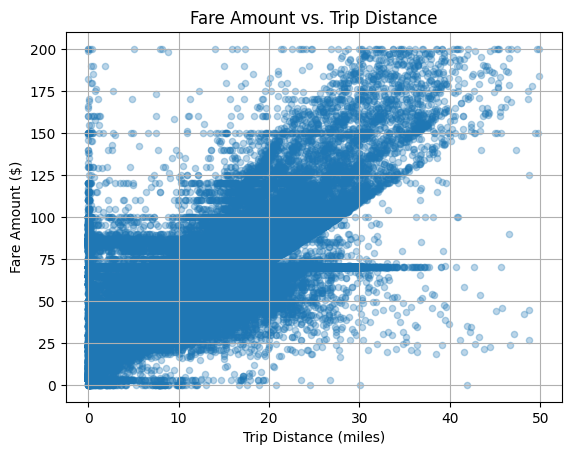

In [0]:
# Scatter plot to visualize the relationship between trip distance and fare amount

df_transformed.filter(
    (df_transformed.trip_distance <= 50) & 
    (df_transformed.fare_amount <= 200)
).select("trip_distance", "fare_amount") \
.toPandas().plot(kind="scatter", x="trip_distance", y="fare_amount", alpha=0.3)

import matplotlib.pyplot as plt
plt.title("Fare Amount vs. Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()


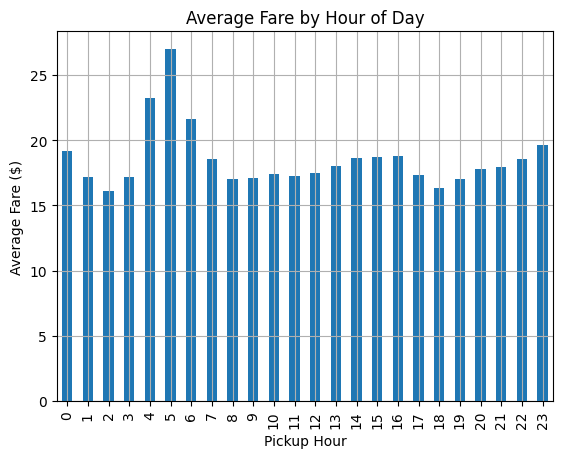

In [0]:
# Bar plot to show how average fare changes by hour of the day

df_transformed.groupBy("pickup_hour").avg("fare_amount").orderBy("pickup_hour") \
.toPandas().plot(x="pickup_hour", y="avg(fare_amount)", kind="bar", legend=False)

plt.title("Average Fare by Hour of Day")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.show()


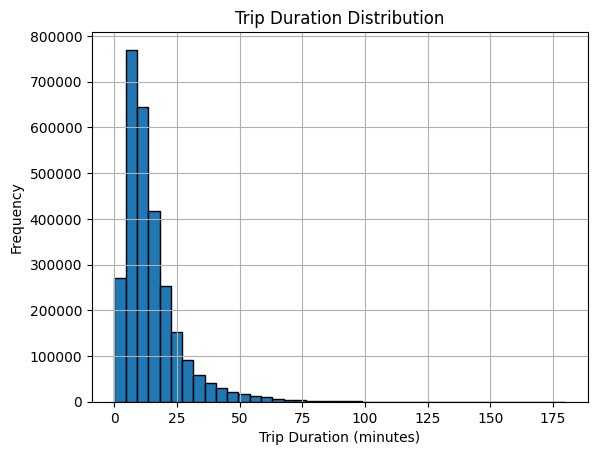

In [0]:
# Histogram of trip durations to see distribution of ride lengths

df_transformed.select("trip_duration_minutes").toPandas()["trip_duration_minutes"] \
.plot(kind="hist", bins=40, edgecolor="black")

plt.title("Trip Duration Distribution")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


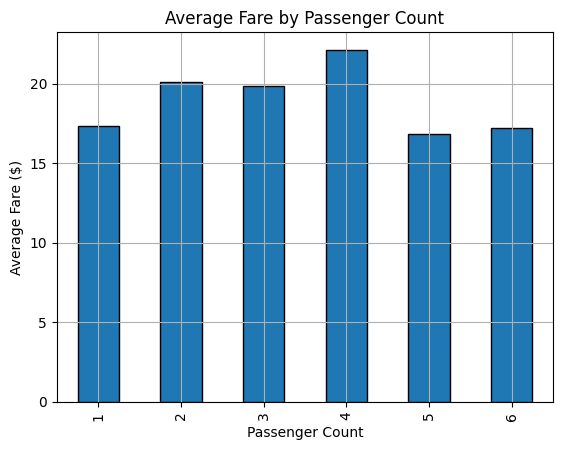

In [0]:
# Bar plot to explore how average fare changes with number of passengers

df_transformed.groupBy("passenger_count").avg("fare_amount").orderBy("passenger_count") \
.toPandas().plot(x="passenger_count", y="avg(fare_amount)", kind="bar", edgecolor="black", legend=False)

plt.title("Average Fare by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.show()


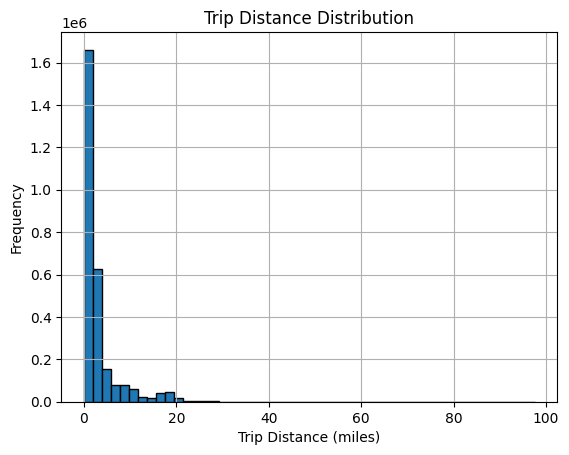

In [0]:
# Histogram of trip distances to understand typical ride lengths

df_transformed.select("trip_distance").toPandas()["trip_distance"] \
.plot(kind="hist", bins=50, edgecolor="black")

plt.title("Trip Distance Distribution")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


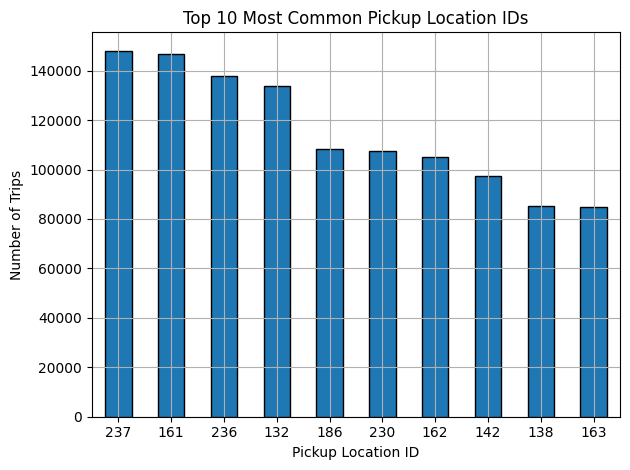

In [0]:
# Group by pickup location ID and count number of trips
top_pu = df_transformed.groupBy("PULocationID") \
    .count() \
    .orderBy("count", ascending=False) \
    .limit(10) \
    .toPandas()

# Plot the top pickup location IDs
top_pu.plot(x="PULocationID", y="count", kind="bar", legend=False, edgecolor="black")

import matplotlib.pyplot as plt
plt.title("Top 10 Most Common Pickup Location IDs")
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


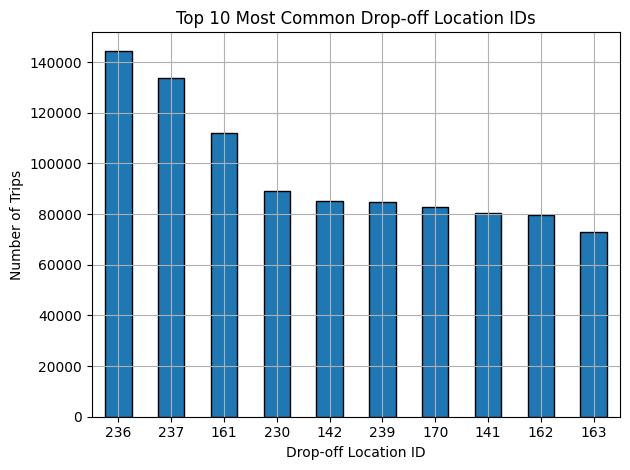

In [0]:
# Group by drop-off location ID and count number of trips
top_do = df_transformed.groupBy("DOLocationID") \
    .count() \
    .orderBy("count", ascending=False) \
    .limit(10) \
    .toPandas()

# Plot the top drop-off location IDs
top_do.plot(x="DOLocationID", y="count", kind="bar", legend=False, edgecolor="black")

import matplotlib.pyplot as plt
plt.title("Top 10 Most Common Drop-off Location IDs")
plt.xlabel("Drop-off Location ID")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


After cleaning and transforming the January 2025 NYC taxi dataset, our team performed an exploratory data analysis to understand trends in trip behavior, fare structure, and location demand. The average fare is $17.93 indicating a slightly right-skewed distribution due to a small number of higher fares. The average trip distance is 3.18 miles, while durations average around 14.6 minutes, with most trips lasting under 20 minutes. Visualizations confirmed that trip distances are heavily concentrated under 5 miles, and that fare amount increases with distance in a generally linear direction, though clusters may suggest pre set pricing. Fares were found to peak for 4-passenger rides, and both fare and trip duration tend to rise during morning and mid-afternoon hours. Lastly, pickup and drop-off location analysis revealed common zones such as 236, 237, and 161, which consistently appear among the top 10 most common locations, highlighting areas of high activity. 

**Machine Learning**

1. Random Forest Model - Predicting Tip Amounts

In [0]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
df_pandas = df_transformed.limit(50000).toPandas()  # Reduce to 50K rows 

In [0]:
# Step 3: Create tip_level target variable
# 0 = No tip, 1 = Low tip (≤ $2), 2 = Medium tip (≤ $5), 3 = High tip
def categorize_tip(tip):
    if tip == 0:
        return 0
    elif tip <= 2:
        return 1
    elif tip <= 5:
        return 2
    else:
        return 3

df_pandas['tip_level'] = df_pandas['tip_amount'].apply(categorize_tip)

In [0]:
# Step 4: Select features already available in df_transformed
features = [
    'trip_distance', 'passenger_count', 'pickup_hour',
    'congestion_surcharge', 'trip_duration_minutes', 'fare_amount',
    'VendorID', 'PULocationID', 'DOLocationID'
]

In [0]:
# Step 5: Prepare feature matrix and target variable
X = df_pandas[features]
y = df_pandas['tip_level']

In [0]:
# Step 6: One-hot encode categorical variables
categorical_cols = ['VendorID', 'PULocationID', 'DOLocationID']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [0]:
# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [0]:
# Step 8: Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

/databricks/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier(max_depth=10, random_state=42)

In [0]:
# Step 9: Evaluate model performance
y_pred = rf_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 260    0 1717  750]
 [  29    0 1112  119]
 [  61    0 3815  272]
 [  60    0  250 1555]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.10      0.17      2727
           1       0.00      0.00      0.00      1260
           2       0.55      0.92      0.69      4148
           3       0.58      0.83      0.68      1865

    accuracy                           0.56     10000
   macro avg       0.44      0.46      0.38     10000
weighted avg       0.51      0.56      0.46     10000



/databricks/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


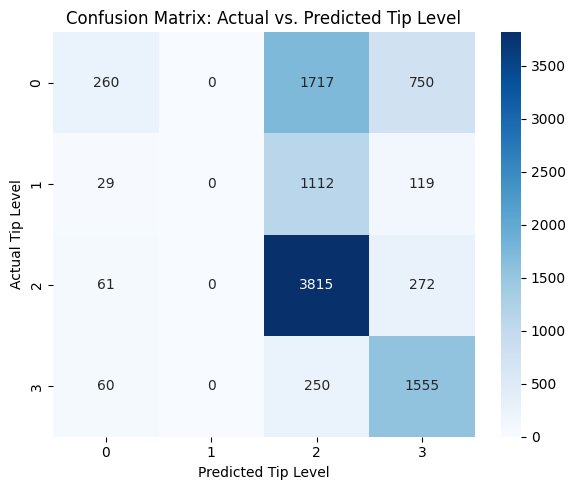

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel("Predicted Tip Level")
plt.ylabel("Actual Tip Level")
plt.title("Confusion Matrix: Actual vs. Predicted Tip Level")
plt.tight_layout()
plt.show()




2. XGBoost - Predicting Fare Amount

In [0]:
# Display the schema of all columns in the DataFrame
df_transformed.printSchema()


root
 |-- VendorID: integer (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- pickup_hour: integer (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- trip_duration_minutes: double (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)



In [0]:
df_pandas = df_transformed.limit(50000).toPandas()  # Reduce to 50K rows


In [0]:
df_pandas = df_pandas.dropna()
features = [
    'trip_distance', 'passenger_count', 'pickup_hour', 'congestion_surcharge',
    'trip_duration_minutes', 'VendorID', 'PULocationID', 'DOLocationID'
]
X = df_pandas[features]
y = df_pandas['fare_amount']


In [0]:
from sklearn.model_selection import train_test_split

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [0]:
# Install XGBoost (only run once)
!pip install xgboost --upgrade

# Imports
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
# Initialize and fit the model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [0]:
# Predict
y_pred = xgb_model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Root Mean Squared Error (RMSE): 5.29
R-squared (R²): 0.92


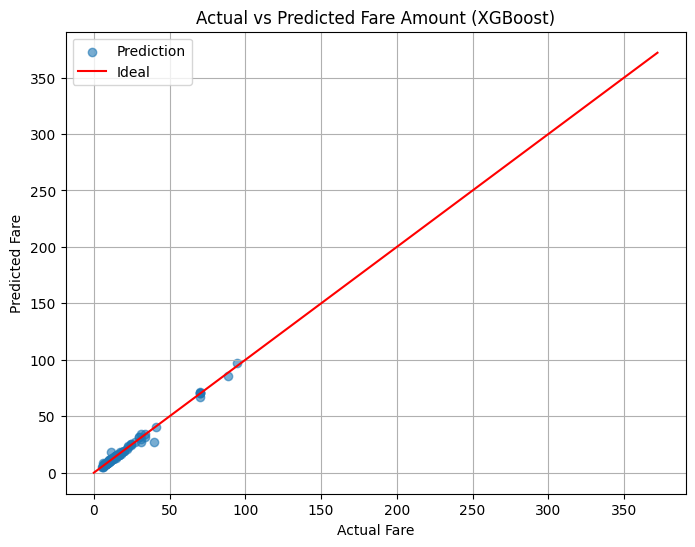

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test[:100], y_pred[:100], alpha=0.6, label="Prediction")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Ideal')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare Amount (XGBoost)")
plt.legend()
plt.grid()
plt.show()


In [0]:
features = [
    'trip_distance', 'passenger_count', 'pickup_hour',
    'congestion_surcharge', 'trip_duration_minutes',
    'VendorID', 'PULocationID', 'DOLocationID'
]

X = df_pandas[features]
y = df_pandas['fare_amount']


In [0]:
import pandas as pd

In [0]:
categorical_cols = ['VendorID', 'PULocationID', 'DOLocationID']

# One-hot encode the categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [0]:
categorical_cols = ['VendorID', 'PULocationID', 'DOLocationID']

# One-hot encode the categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [0]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [0]:
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Root Mean Squared Error (RMSE): 5.33
R-squared (R²): 0.92


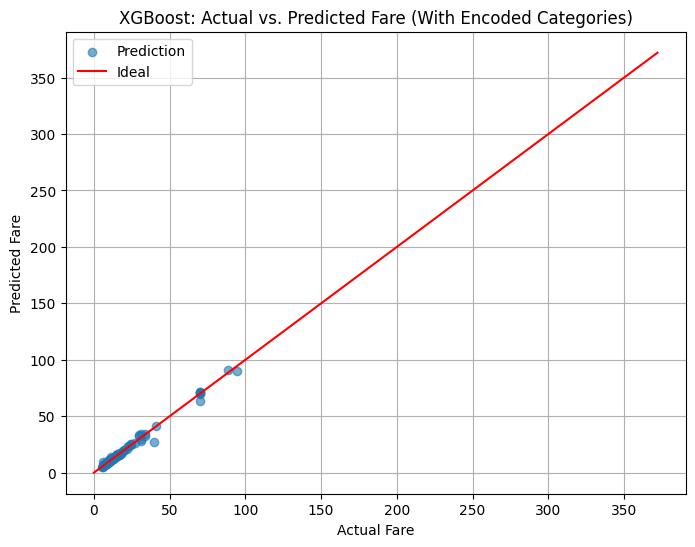

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test[:100], y_pred[:100], alpha=0.6, label='Prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Ideal')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("XGBoost: Actual vs. Predicted Fare (With Encoded Categories)")
plt.legend()
plt.grid(True)
plt.show()


3. Pickup Location Clusters: K-Means ML Model

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col


In [0]:
df_transformed.columns


['VendorID',
 'passenger_count',
 'trip_distance',
 'payment_type',
 'fare_amount',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'pickup_hour',
 'congestion_surcharge',
 'trip_duration_minutes',
 'PULocationID',
 'DOLocationID']

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline


In [0]:
features = [
    'PULocationID',
    'pickup_hour',
    'passenger_count',
    'trip_distance',
    'fare_amount'
]

df_selected = df_transformed.select(features)


In [0]:
# Index the PULocationID (categorical)
indexer = StringIndexer(inputCol='PULocationID', outputCol='PULocationID_index')

# One-hot encode the indexed column
encoder = OneHotEncoder(inputCol='PULocationID_index', outputCol='PULocationID_encoded')


In [0]:
assembler = VectorAssembler(
    inputCols=['PULocationID_encoded', 'pickup_hour', 'passenger_count', 'trip_distance', 'fare_amount'],
    outputCol='features'
)


In [0]:
kmeans = KMeans(featuresCol='features', predictionCol='cluster', k=5, seed=42)


In [0]:
pipeline = Pipeline(stages=[indexer, encoder, assembler, kmeans])
model = pipeline.fit(df_selected)
df_clustered = model.transform(df_selected)


In [0]:
df_clustered.select("PULocationID", "pickup_hour", "cluster").show(10)


+------------+-----------+-------+
|PULocationID|pickup_hour|cluster|
+------------+-----------+-------+
|         229|          0|      0|
|         236|          0|      0|
|         141|          0|      0|
|         244|          0|      0|
|         244|          0|      0|
|         239|          0|      3|
|         237|          0|      0|
|         237|          0|      0|
|         263|          0|      0|
|         236|          0|      0|
+------------+-----------+-------+
only showing top 10 rows



In [0]:
df_features = pipeline.fit(df_selected).transform(df_selected)
df_features.select("features").show(truncate=False)


+------------------------------------------+
|features                                  |
+------------------------------------------+
|(254,[24,251,252,253],[1.0,1.0,1.6,10.0]) |
|(254,[2,251,252,253],[1.0,1.0,0.5,5.1])   |
|(254,[15,251,252,253],[1.0,1.0,0.6,5.1])  |
|(254,[61,251,252,253],[1.0,3.0,0.52,7.2]) |
|(254,[61,251,252,253],[1.0,3.0,0.66,5.8]) |
|(254,[10,251,252,253],[1.0,2.0,2.63,19.1])|
|(254,[0,251,252,253],[1.0,1.0,1.71,11.4]) |
|(254,[0,251,252,253],[1.0,1.0,2.29,11.4]) |
|(254,[21,251,252,253],[1.0,1.0,0.56,5.8]) |
|(254,[2,251,252,253],[1.0,3.0,1.99,14.2]) |
|(254,[24,251,252,253],[1.0,1.0,1.1,7.9])  |
|(254,[15,251,252,253],[1.0,1.0,3.2,26.1]) |
|(254,[37,251,252,253],[1.0,3.0,2.5,17.7]) |
|(254,[17,251,252,253],[1.0,1.0,1.9,16.3]) |
|(254,[18,251,252,253],[1.0,1.0,0.71,7.2]) |
|(254,[23,251,252,253],[1.0,2.0,1.2,15.6]) |
|(254,[21,251,252,253],[1.0,2.0,3.45,17.7])|
|(254,[23,251,252,253],[1.0,2.0,1.19,14.9])|
|(254,[32,251,252,253],[1.0,1.0,0.69,6.5]) |
|(254,[7,2

In [0]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)


In [0]:
kmeans = KMeans(featuresCol='scaled_features', predictionCol='cluster', k=5, seed=42)

pipeline = Pipeline(stages=[indexer, encoder, assembler, scaler, kmeans])
model = pipeline.fit(df_selected)
df_clustered = model.transform(df_selected)


In [0]:
df_filtered = df_transformed.filter(
    (df_transformed.passenger_count > 0) &
    (df_transformed.trip_distance > 0) &
    (df_transformed.fare_amount > 0)
)


In [0]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans

# Filter valid trips
df_filtered = df_transformed.filter(
    (df_transformed.trip_distance > 0) &
    (df_transformed.fare_amount > 0)
)

# Select features for clustering
features_to_use = ["pickup_hour", "trip_distance", "fare_amount", "PULocationID"]

# Encode categorical
indexer = StringIndexer(inputCol="PULocationID", outputCol="PULocationID_index")
encoder = OneHotEncoder(inputCol="PULocationID_index", outputCol="PULocationID_encoded")

# Assemble all features
assembler = VectorAssembler(
    inputCols=["pickup_hour", "trip_distance", "fare_amount", "PULocationID_encoded"],
    outputCol="assembled_features"
)

# Scale
scaler = StandardScaler(inputCol="assembled_features", outputCol="scaled_features")


In [0]:
kmeans = KMeans(featuresCol="scaled_features", predictionCol="cluster", k=4, seed=1)

# Full pipeline
pipeline = Pipeline(stages=[indexer, encoder, assembler, scaler, kmeans])
model = pipeline.fit(df_filtered)
df_clustered = model.transform(df_filtered)


In [0]:
df_clustered.groupBy("cluster").count().orderBy("count", ascending=False).show()


+-------+-------+
|cluster|  count|
+-------+-------+
|      0|2623378|
|      2| 191365|
|      1|    434|
|      3|    277|
+-------+-------+



In [0]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans

# Filter rows with valid values (optional but helps eliminate noise)
df_filtered = df_transformed.filter(
    (df_transformed.trip_distance > 0) &
    (df_transformed.fare_amount > 0)
)

# Step 1: Feature transformation
indexer = StringIndexer(inputCol="PULocationID", outputCol="PULocationID_index")
encoder = OneHotEncoder(inputCol="PULocationID_index", outputCol="PULocationID_encoded")

assembler = VectorAssembler(
    inputCols=["pickup_hour", "trip_distance", "fare_amount", "PULocationID_encoded"],
    outputCol="assembled_features"
)

scaler = StandardScaler(inputCol="assembled_features", outputCol="scaled_features")

# Step 2: KMeans Model
kmeans = KMeans(featuresCol="scaled_features", predictionCol="cluster", k=5, seed=42)

# Step 3: Build pipeline and fit
pipeline = Pipeline(stages=[indexer, encoder, assembler, scaler, kmeans])
model = pipeline.fit(df_filtered)

# Step 4: Apply to data
df_clustered = model.transform(df_filtered)


In [0]:
df_clustered.groupBy("cluster").count().orderBy("count", ascending=False).show()


+-------+-------+
|cluster|  count|
+-------+-------+
|      0|2788662|
|      1|  25567|
|      2|    732|
|      4|    263|
|      3|    230|
+-------+-------+



In [0]:
display(
  df_clustered.groupBy("pickup_hour", "cluster")
  .count()
  .orderBy("pickup_hour", "cluster")
)


pickup_hour,cluster,count
0,0,62545
0,1,2529
0,2,2
0,3,3
1,0,41031
1,1,2625
1,2,1
1,3,1
1,4,1
2,0,27089


4. Trip Duration Prediction - Linear Regression 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [0]:
# If pickup_datetime still exists and you need hour/dayofweek features
if 'pickup_datetime' in df.columns:
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek

# Drop datetime columns that are no longer needed
if 'pickup_datetime' in df.columns:
    df = df.drop(['pickup_datetime'], axis=1)

if 'dropoff_datetime' in df.columns:
    df = df.drop(['dropoff_datetime'], axis=1)

# Drop missing values (if any)
df = df.dropna()


In [0]:
# Convert timestamps
df = df.withColumn("pickup_datetime", df["tpep_pickup_datetime"].cast("timestamp"))
df = df.withColumn("dropoff_datetime", df["tpep_dropoff_datetime"].cast("timestamp"))

# Create trip_duration in minutes
from pyspark.sql.functions import (unix_timestamp, col)

df = df.withColumn(
    "trip_duration",
    (unix_timestamp("dropoff_datetime") - unix_timestamp("pickup_datetime")) / 60
)

# Drop the old pickup/dropoff columns if needed
df = df.drop('tpep_pickup_datetime', 'tpep_dropoff_datetime')


In [0]:
# Convert to pandas
df_pd = df.toPandas()

# Define target
y = df_pd['trip_duration']

# Define features
X = df_pd.drop('trip_duration', axis=1)

# Continue with train/test split, model training, etc.


In [0]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [0]:
X_train.dtypes


VendorID                          int32
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
dtype: object

In [0]:
from sklearn.linear_model import LinearRegression

# Create the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
~/.ipykernel/45114/command-2477570942175043-2740647214 in ?()
      3 # Create the Linear Regression model
      4 lr_model = LinearRegression()
      5 
      6 # Train the model
----> 7 lr_model.fit(X_train, y_train)

/databricks/python/lib/python3.11/site-packages/mlflow/utils/autologging_utils/safety.py in ?(*args, **kwargs)
    593                     # Exceptions thrown during execution of the original function should be
    594                     # propagated to the caller. Additionally, exceptions encountered during test
    595                     # mode should be reraised to detect bugs in autologging implementations
    596                     if failed_during_original or is_testing():
--> 597                         raise
    598 
    599                 if is_testing() and not preexisting_run_for_testing:
    600          

In [0]:
# Drop any columns with object (string) type
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# Now redo the train/test split with numeric features only
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42
)

# Train again
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [0]:
y_pred = lr_model.predict(X_test)


In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 6.57
RMSE: 28.69
R² Score: 0.07


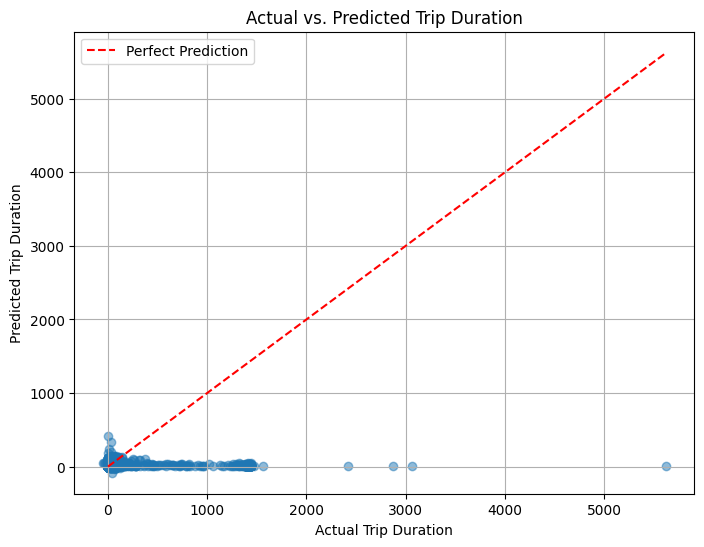

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Trip Duration")
plt.ylabel("Predicted Trip Duration")
plt.title("Actual vs. Predicted Trip Duration")
plt.legend()
plt.grid(True)
plt.show()


In [0]:
df.select("trip_duration").describe().show()


+-------+-------------------+
|summary|      trip_duration|
+-------+-------------------+
|  count|            2935077|
|   mean| 14.955576173982823|
| stddev|  41.91287837060689|
|    min|-51472.316666666666|
|    max|  5626.316666666667|
+-------+-------------------+



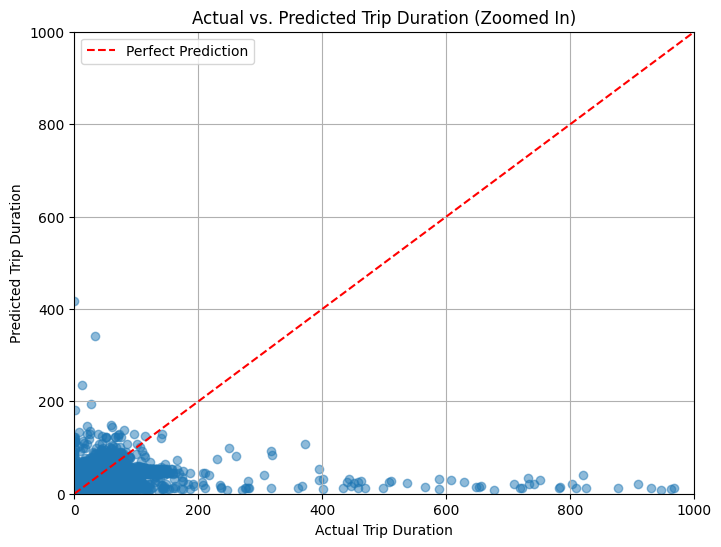

In [0]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Trip Duration")
plt.ylabel("Predicted Trip Duration")
plt.title("Actual vs. Predicted Trip Duration (Zoomed In)")
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.legend()
plt.grid(True)
plt.show()


In [0]:
df = df.withColumn("trip_duration_minutes", df["trip_duration"] / 60)


In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


MAE: 6.573900915068937
RMSE: 28.694321196835052
R²: 0.07104465350548028


In [0]:
from pyspark.sql.functions import hour, dayofweek


In [0]:
df = df.withColumn("pickup_hour", hour(df["pickup_datetime"]))
df = df.withColumn("pickup_day", dayofweek(df["pickup_datetime"]))


In [0]:
df = df.withColumn("pickup_hour", hour(df["pickup_datetime"]))
df = df.withColumn("pickup_day", dayofweek(df["pickup_datetime"]))


In [0]:
df = df.filter((df["trip_duration_minutes"] > 0) & (df["trip_duration_minutes"] < 120))


In [0]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


MAE: 6.573900915068937
RMSE: 28.694321196835052
R²: 0.07104465350548028
